# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


In [ ]:
columns = ['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']

Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_clients.csv"
clients = pd.read_csv(url)
clients.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0


In [ ]:
clients.duplicated(subset='ID', keep='first').sum() # Видим, что дублей нет в клиентах

0

In [ ]:
set(columns) - set(clients.columns) # Смотрим каких колонок в таблице с клиентами не хватает до минимальных необходимых

{'AGREEMENT_RK',
 'LOAN_NUM_CLOSED',
 'LOAN_NUM_TOTAL',
 'PERSONAL_INCOME',
 'TARGET'}

In [ ]:
url = "https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_loan.csv"
loan = pd.read_csv(url)
loan.head()

,ID_LOAN,ID_CLIENT
0,1753790658,106804370
1,1753790659,106804371
2,1753790660,106804372
3,1753790661,106804372
4,1753790662,106804373


In [ ]:
loan.duplicated(subset='ID_LOAN', keep='first').sum() # повторений нет

0

In [ ]:
url = "https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_close_loan.csv"
close_loan = pd.read_csv(url)
close_loan.head()

,ID_LOAN,CLOSED_FL
0,1753790658,1
1,1753790659,1
2,1753790660,1
3,1753790661,0
4,1753790662,1


In [ ]:
close_loan.duplicated(subset='ID_LOAN', keep='first').sum() # повторений нет

0

In [ ]:
loan_info = pd.merge(loan, close_loan, on='ID_LOAN', how='left')
loan_info.head()

,ID_LOAN,ID_CLIENT,CLOSED_FL
0,1753790658,106804370,1
1,1753790659,106804371,1
2,1753790660,106804372,1
3,1753790661,106804372,0
4,1753790662,106804373,1


In [ ]:
grouped = loan_info.groupby('ID_CLIENT')
fl = grouped['CLOSED_FL']
clients = pd.merge(clients, fl.sum(), left_on='ID', right_on='ID_CLIENT', how='left')
clients.rename(columns={'CLOSED_FL':'LOAN_NUM_CLOSED'}, inplace=True)
clients.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,LOAN_NUM_CLOSED
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,0.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,1.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,2.0


In [ ]:
clients = pd.merge(clients, fl.sum() / fl.mean(), left_on='ID', right_on='ID_CLIENT', how='left')
clients.rename(columns={'CLOSED_FL':'LOAN_NUM_TOTAL'}, inplace=True)
clients.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,LOAN_NUM_CLOSED,LOAN_NUM_TOTAL
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,0.0,NaN
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,0.0,NaN
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,1.0,1.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,0.0,NaN
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,2.0,2.0


In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 0 to 15999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       16000 non-null  int64  
 1   AGE                      16000 non-null  int64  
 2   GENDER                   16000 non-null  int64  
 3   EDUCATION                16000 non-null  object 
 4   MARITAL_STATUS           16000 non-null  object 
 5   CHILD_TOTAL              16000 non-null  int64  
 6   DEPENDANTS               16000 non-null  int64  
 7   SOCSTATUS_WORK_FL        16000 non-null  int64  
 8   SOCSTATUS_PENS_FL        16000 non-null  int64  
 9   REG_ADDRESS_PROVINCE     16000 non-null  object 
 10  FACT_ADDRESS_PROVINCE    16000 non-null  object 
 11  POSTAL_ADDRESS_PROVINCE  16000 non-null  object 
 12  FL_PRESENCE_FL           16000 non-null  int64  
 13  OWN_AUTO                 16000 non-null  int64  
 14  LOAN_NUM_CLOSED       

Видим, что LOAN_NUM_CLOSED имеет пропуски, следовательно нету информации об остальных клиентах, значит для них заполним нулями. И ещё LOAN_NUM_TOTAL тоже имеет пропуски, но к предыдущему добавляется то, что для поиска общего числа мы искали путем нахождения суммы закрытых кредитов клиентом деленое на среднее значение. В пример если у человека 5 кредитов, но закрыто 2, то сумма закрытых будет 2, а среднее будет 0.4, поэтому 2/0.4=5, так и находил, но если человек вообще не брал кредитов, тогда будет 0/0, что и давало NaN, и все такие случаи мы заменим на нули.

In [ ]:
clients = clients.fillna(0)
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 0 to 15999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       16000 non-null  int64  
 1   AGE                      16000 non-null  int64  
 2   GENDER                   16000 non-null  int64  
 3   EDUCATION                16000 non-null  object 
 4   MARITAL_STATUS           16000 non-null  object 
 5   CHILD_TOTAL              16000 non-null  int64  
 6   DEPENDANTS               16000 non-null  int64  
 7   SOCSTATUS_WORK_FL        16000 non-null  int64  
 8   SOCSTATUS_PENS_FL        16000 non-null  int64  
 9   REG_ADDRESS_PROVINCE     16000 non-null  object 
 10  FACT_ADDRESS_PROVINCE    16000 non-null  object 
 11  POSTAL_ADDRESS_PROVINCE  16000 non-null  object 
 12  FL_PRESENCE_FL           16000 non-null  int64  
 13  OWN_AUTO                 16000 non-null  int64  
 14  LOAN_NUM_CLOSED       

In [ ]:
clients.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,LOAN_NUM_CLOSED,LOAN_NUM_TOTAL
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,0.0,0.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,0.0,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,1.0,1.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,0.0,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,2.0,2.0


In [ ]:
url = "https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_salary.csv"
salary = pd.read_csv(url)
salary.head()

,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620


In [ ]:
salary.duplicated(subset='ID_CLIENT', keep='first').sum() # повторения есть

300

In [ ]:
dupl = salary[salary.duplicated('ID_CLIENT', keep=False)]
dupl # без первого 300 совпадений, с ним 600, следовательно у нас только 300 записей которые встречаются всего дважды

,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
39,от 10000 до 20000 руб.,12000.0,106806016
49,от 10000 до 20000 руб.,19000.0,106818237
118,от 20000 до 50000 руб.,11000.0,106819079
174,от 20000 до 50000 руб.,30000.0,106813860
222,от 20000 до 50000 руб.,15000.0,106813844
...,...,...,...
15324,от 20000 до 50000 руб.,11000.0,106809457
15431,от 10000 до 20000 руб.,12000.0,106811264
15475,от 10000 до 20000 руб.,7000.0,106809872
15485,от 20000 до 50000 руб.,18000.0,106807192


In [ ]:
pers_inc = dupl.groupby('ID_CLIENT')['PERSONAL_INCOME']
(pers_inc.max() - pers_inc.min()).sum() # Удостоверились, что все повторяющиеся не отличаются друг от друга и мы можем спокойно просто удалять повторения

0.0

In [ ]:
print(salary.shape)
salary.drop_duplicates(subset='ID_CLIENT', keep='first', inplace=True)
print(salary.shape) # види, что стало на 300 меньше
salary.head()

(15523, 3)
(15223, 3)


,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620


In [ ]:
clients = pd.merge(clients, salary, left_on='ID', right_on='ID_CLIENT', how='left')
clients.drop(['FAMILY_INCOME', 'ID_CLIENT'], axis=1, inplace=True)
clients.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,LOAN_NUM_CLOSED,LOAN_NUM_TOTAL,PERSONAL_INCOME
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,0.0,0.0,25000.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,0.0,0.0,10000.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,1.0,1.0,30000.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,0.0,0.0,25000.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,2.0,2.0,15000.0


In [ ]:
clients.info() # PERSONAL_INCOME имеет пропуски поэтому мы заполним их

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 0 to 15999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       16000 non-null  int64  
 1   AGE                      16000 non-null  int64  
 2   GENDER                   16000 non-null  int64  
 3   EDUCATION                16000 non-null  object 
 4   MARITAL_STATUS           16000 non-null  object 
 5   CHILD_TOTAL              16000 non-null  int64  
 6   DEPENDANTS               16000 non-null  int64  
 7   SOCSTATUS_WORK_FL        16000 non-null  int64  
 8   SOCSTATUS_PENS_FL        16000 non-null  int64  
 9   REG_ADDRESS_PROVINCE     16000 non-null  object 
 10  FACT_ADDRESS_PROVINCE    16000 non-null  object 
 11  POSTAL_ADDRESS_PROVINCE  16000 non-null  object 
 12  FL_PRESENCE_FL           16000 non-null  int64  
 13  OWN_AUTO                 16000 non-null  int64  
 14  LOAN_NUM_CLOSED       

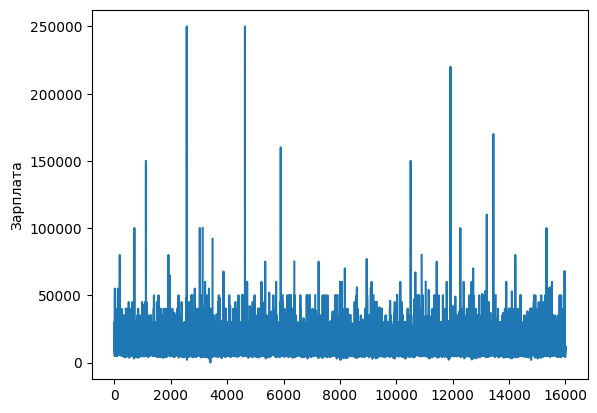

In [ ]:
import matplotlib.pyplot as plt
plt.plot(clients['PERSONAL_INCOME'])
plt.ylabel('Зарплата')
plt.show() # Есть какие-то сильные отклонения, вряд ли это выбросы, но все же выберу не среднее, а медианное значение

In [ ]:
clients['PERSONAL_INCOME'].fillna(clients['PERSONAL_INCOME'].median(), inplace=True)

In [ ]:
url = "https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_target.csv"
target = pd.read_csv(url)
target.head()

,AGREEMENT_RK,ID_CLIENT,TARGET
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0
3,59910803,106804373,0
4,59911781,106804374,0


In [ ]:
target.duplicated(subset='ID_CLIENT', keep='first').sum() # повторений нет

0

In [ ]:
clients = pd.merge(clients, target, left_on='ID', right_on='ID_CLIENT', how='left')
clients.drop('ID_CLIENT', axis=1, inplace=True)
clients.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,LOAN_NUM_CLOSED,LOAN_NUM_TOTAL,PERSONAL_INCOME,AGREEMENT_RK,TARGET
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,0.0,0.0,25000.0,60099204.0,1.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,0.0,0.0,10000.0,62244665.0,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,1.0,1.0,30000.0,61050759.0,0.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,0.0,0.0,25000.0,62079659.0,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,2.0,2.0,15000.0,66583553.0,0.0


In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 0 to 15999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       16000 non-null  int64  
 1   AGE                      16000 non-null  int64  
 2   GENDER                   16000 non-null  int64  
 3   EDUCATION                16000 non-null  object 
 4   MARITAL_STATUS           16000 non-null  object 
 5   CHILD_TOTAL              16000 non-null  int64  
 6   DEPENDANTS               16000 non-null  int64  
 7   SOCSTATUS_WORK_FL        16000 non-null  int64  
 8   SOCSTATUS_PENS_FL        16000 non-null  int64  
 9   REG_ADDRESS_PROVINCE     16000 non-null  object 
 10  FACT_ADDRESS_PROVINCE    16000 non-null  object 
 11  POSTAL_ADDRESS_PROVINCE  16000 non-null  object 
 12  FL_PRESENCE_FL           16000 non-null  int64  
 13  OWN_AUTO                 16000 non-null  int64  
 14  LOAN_NUM_CLOSED       

Опять видим, что не хватает 777 человек, видимо это одни и те же на протяжении всех объединений, видимо по ним просто нет данных, кроме как в изначальной таблице. В данном случае эта та информация, которую не получится заполнить, по крайней мере колонку TARGET точно, но так как 777 записей из 16000 это меньше 5%, думаю эти данные можно опустить, ну или отправить в тестовую выборку, хотя данные будут не так хороши, ведь судя по всему именно они не имеют значений в добавленных колонках и нам приходилось заполнять эти пропуски самим.

In [ ]:
bad_clients = clients[clients['TARGET'].isna()]
bad_clients

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,LOAN_NUM_CLOSED,LOAN_NUM_TOTAL,PERSONAL_INCOME,AGREEMENT_RK,TARGET
35,106820101,33,1,Среднее,Состою в браке,1,1,1,0,Кемеровская область,Кемеровская область,Кемеровская область,0,0,0.0,0.0,12000.0,NaN,NaN
88,106819731,58,1,Среднее специальное,Состою в браке,2,0,0,1,Алтайский край,Алтайский край,Алтайский край,0,0,0.0,0.0,12000.0,NaN,NaN
93,106820056,34,1,Высшее,Состою в браке,2,2,1,0,Читинская область,Читинская область,Читинская область,0,0,0.0,0.0,12000.0,NaN,NaN
119,106820194,45,0,Высшее,Состою в браке,0,0,1,0,Волгоградская область,Волгоградская область,Волгоградская область,0,0,0.0,0.0,12000.0,NaN,NaN
126,106820112,34,1,Среднее,Состою в браке,1,1,1,0,Кемеровская область,Кемеровская область,Кемеровская область,1,0,0.0,0.0,12000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15876,106819660,64,1,Среднее,Не состоял в браке,0,0,0,1,Алтайский край,Алтайский край,Алтайский край,1,0,0.0,0.0,12000.0,NaN,NaN
15899,106819886,48,1,Среднее специальное,Не состоял в браке,0,0,1,0,Тюменская область,Тюменская область,Тюменская область,1,0,0.0,0.0,12000.0,NaN,NaN
15916,106819938,37,1,Среднее специальное,Разведен(а),1,1,1,0,Тамбовская область,Тамбовская область,Тамбовская область,0,0,0.0,0.0,12000.0,NaN,NaN
15945,106819995,45,1,Среднее специальное,Разведен(а),2,0,1,0,Белгородская область,Белгородская область,Белгородская область,0,0,0.0,0.0,12000.0,NaN,NaN


In [ ]:
clients = pd.merge(clients, bad_clients, how='outer', indicator=True).loc[lambda x: x['_merge'] == 'left_only'].drop('_merge', axis=1)
clients

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,LOAN_NUM_CLOSED,LOAN_NUM_TOTAL,PERSONAL_INCOME,AGREEMENT_RK,TARGET
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,0.0,0.0,25000.0,60099204.0,1.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,0.0,0.0,10000.0,62244665.0,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,1.0,1.0,30000.0,61050759.0,0.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,0.0,0.0,25000.0,62079659.0,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,2.0,2.0,15000.0,66583553.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,Чувашия,Чувашия,0,0,2.0,2.0,8000.0,66751099.0,0.0
15996,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,Карелия,Карелия,0,0,0.0,0.0,12000.0,64562377.0,0.0
15997,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,Белгородская область,Белгородская область,0,0,0.0,0.0,9000.0,62236542.0,0.0
15998,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0,1.0,1.0,12000.0,66739926.0,0.0


In [ ]:
set(columns) - set(clients.columns) # Смотрим каких колонок в таблице с клиентами не хватает до минимальных необходимых

set()

Таким образом мы добавили все необходимые поля, теперь убираем лишнее и делаем ещё некоторые изменения.

In [ ]:
set(clients.columns) - set(columns) # Смотрим каких колонок в таблице с клиентами не хватает до минимальных необходимых

{'EDUCATION',
 'FACT_ADDRESS_PROVINCE',
 'FL_PRESENCE_FL',
 'ID',
 'MARITAL_STATUS',
 'OWN_AUTO',
 'POSTAL_ADDRESS_PROVINCE',
 'REG_ADDRESS_PROVINCE'}

In [ ]:
clients.drop(['EDUCATION', 'FACT_ADDRESS_PROVINCE', 'FL_PRESENCE_FL', 'ID', 'MARITAL_STATUS', 'OWN_AUTO', 'POSTAL_ADDRESS_PROVINCE', 'REG_ADDRESS_PROVINCE'], axis=1, inplace=True)

In [ ]:
clients.describe(include='all')

,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,LOAN_NUM_CLOSED,LOAN_NUM_TOTAL,PERSONAL_INCOME,AGREEMENT_RK,TARGET
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,1.522300e+04,15223.000000
mean,40.406096,0.654536,1.099389,0.645208,0.909610,0.134468,0.751889,0.865992,13853.836323,6.540183e+07,0.119030
std,11.601068,0.475535,0.995411,0.812252,0.286748,0.341165,0.988499,1.124161,9015.467617,4.568181e+06,0.323835
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,5.991015e+07,0.000000
25%,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8000.000000,6.192092e+07,0.000000
50%,39.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12000.000000,6.437100e+07,0.000000
75%,50.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,17000.000000,6.708802e+07,0.000000
max,67.000000,1.000000,10.000000,7.000000,1.000000,1.000000,11.000000,11.000000,250000.000000,7.529224e+07,1.000000


In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 0 to 15999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15223 non-null  int64  
 1   GENDER             15223 non-null  int64  
 2   CHILD_TOTAL        15223 non-null  int64  
 3   DEPENDANTS         15223 non-null  int64  
 4   SOCSTATUS_WORK_FL  15223 non-null  int64  
 5   SOCSTATUS_PENS_FL  15223 non-null  int64  
 6   LOAN_NUM_CLOSED    15223 non-null  float64
 7   LOAN_NUM_TOTAL     15223 non-null  float64
 8   PERSONAL_INCOME    15223 non-null  float64
 9   AGREEMENT_RK       15223 non-null  float64
 10  TARGET             15223 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 1.4 MB


In [ ]:
clients = clients.astype(int)

In [ ]:
clients.to_csv('clients.csv', index=False)

После того, как сделали все обработки сохраняем в файл.

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.

[репозиторий github со всем необходимым](https://github.com/AlexTrigolos/EDA_bank_client)